## Modified Python Code with Clustering

Missing values before cleaning:
inst          1
time          0
status        0
age           0
sex           0
ph.ecog       1
ph.karno      1
pat.karno     3
meal.cal     47
wt.loss      14
dtype: int64
Missing values after cleaning:
inst         0
time         0
status       0
age          0
sex          0
ph.ecog      0
ph.karno     0
pat.karno    0
meal.cal     0
wt.loss      0
dtype: int64
Cox Model Summary:


C:\Users\Ferdie\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<lifelines.CoxPHFitter: fitted with 167 total observations, 0 right-censored observations>
             duration col = 'time'
                event col = 'status'
      baseline estimation = breslow
   number of observations = 167
number of events observed = 167
   partial log-likelihood = -682.42
         time fit was run = 2025-03-09 06:25:11 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
inst      -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
age       -0.02      0.98      0.02           -0.06            0.03                0.94                1.03
sex       -0.25      0.78      0.16           -0.57            0.07                0.56                1.07
ph.ecog    0.63      1.88      0.21            0.23            1.04                1.26                2.82
ph.karno   0.02      1.02      0.01            0.00            0.04                1.00                1.04
pat.karno -0.01      0.99      0.01           -0.02            0.00                0.98                1.00
meal.cal  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
wt.loss   -0.01      0.99      0.01           -0.02            0.00                0.98                1.00
cluster    0.24      1.27      0.28           -0.32            0.80                0.73                2.22

           cmp to     z      p  -log2(p)
covariate                               
inst         0.00 -1.02   0.31      1.70
age          0.00 -0.77   0.44      1.18
sex          0.00 -1.53   0.13      2.99
ph.ecog      0.00  3.08 <0.005      8.90
ph.karno     0.00  2.35   0.02      5.75
pat.karno    0.00 -1.31   0.19      2.39
meal.cal     0.00 -0.46   0.65      0.63
wt.loss      0.00 -1.73   0.08      3.58
cluster      0.00  0.85   0.40      1.33
---
Concordance = 0.59
Partial AIC = 1382.85
log-likelihood ratio test = 17.52 on 9 df
-log2(p) of ll-ratio test = 4.60

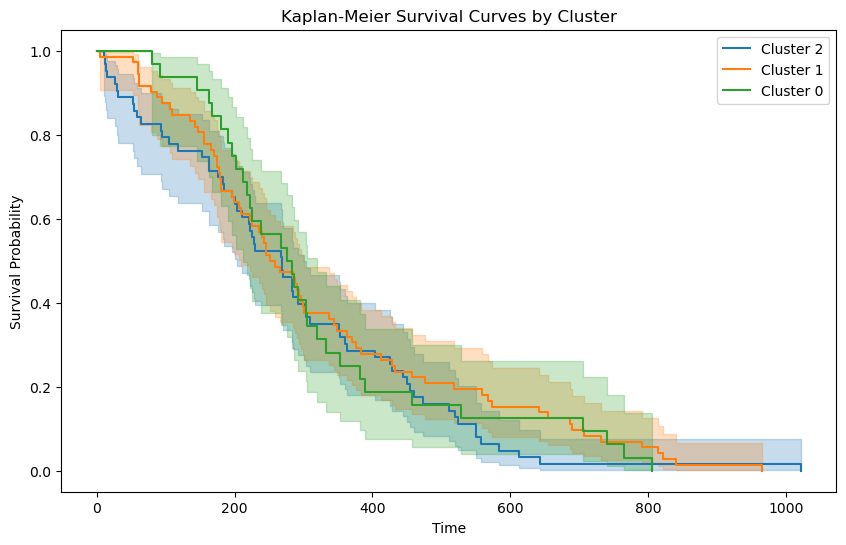

Cluster Summary:
              inst        time    status        age       sex   ph.ecog  \
cluster                                                                   
0        10.187500  322.781250  1.625000  48.406250  1.500000  0.687500   
1        11.027778  326.555556  1.694444  60.847222  1.402778  0.847222   
2        10.603175  284.412698  1.793651  71.730159  1.301587  1.222222   

          ph.karno  pat.karno     meal.cal    wt.loss  
cluster                                                
0        87.500000  84.375000  1064.375000   7.437500  
1        84.305556  81.805556   922.166667  10.541667  
2        76.666667  74.603175   868.380952   9.936508  


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from lifelines import CoxPHFitter, KaplanMeierFitter
import matplotlib.pyplot as plt

data = pd.read_csv("R/data_censored.csv")

print("Missing values before cleaning:")
print(data.isnull().sum())

data_cleaned = data.dropna().copy()

print("Missing values after cleaning:")
print(data_cleaned.isnull().sum())

features = data_cleaned[['age', 'sex', 'ph.ecog']]

kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['cluster'] = kmeans.fit_predict(features)

cph = CoxPHFitter()
cph.fit(data_cleaned, duration_col='time', event_col='status')  

print("Cox Model Summary:")
cph.print_summary()

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
for cluster in data_cleaned['cluster'].unique():
    mask = data_cleaned['cluster'] == cluster
    kmf.fit(data_cleaned[mask]['time'], data_cleaned[mask]['status'], label=f'Cluster {cluster}')
    kmf.plot()

plt.title("Kaplan-Meier Survival Curves by Cluster")
plt.xlabel("Time")
plt.ylabel("Survival Probability")
plt.show()

cluster_summary = data_cleaned.groupby('cluster').mean()
print("Cluster Summary:")
print(cluster_summary)

INSIGHT

Cluster 0 represents younger patients (average age 48) with better performance scores (ph.ecog and ph.karno) and higher calorie intake (meal.cal). They exhibit the longest survival time, indicating a more favorable prognosis.

Cluster 1 includes middle-aged patients (average age 60) with moderate performance scores and lower calorie intake. Their survival time is shorter than Cluster 0, suggesting a moderate prognosis.

Cluster 2 consists of older patients (average age 71) with poorer performance scores and the lowest calorie intake. They have the shortest survival time, indicating the highest risk group

The clustering effectively groups patients based on age, health performance, and nutritional intake, showing how these factors influence survival probability.

In [9]:
pip install lifelines


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=254058ef2a0711ee35380d5731837d15f562e9f124bc034af1a09a2c095f144f
  Stored in directory: c:\users\ferdie\appdata\local\pip\cache\wheels\50\37\21\0a719b9d89c635e89ff24bd93b862882ad675279552013b2fb
Successfully built autograd-gamma
Note: you may need to restart the kernel to use updated packages.
